<a href="https://colab.research.google.com/github/KeitaTakami/WeeklyReport/blob/master/0522/cifar10_delete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install dlt

In [0]:
#dlt=Deep Learning Tools

# parameter
random_AB=0
learningrate=0.001
batch_s=128
change_num=10000
epoch=25
repetition=40
data_num=10000
data_num_ab=int(data_num/2)
import dlt
data=dlt.cifar.load_cifar10()
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
#データの取得,確認
x=data.train_images[:data_num]
x=x.astype('float32')/255.0
print(x.shape)
y=data.train_labels[:data_num]
y=to_categorical(y,10)
print(y.shape)
#print(x[0])
#print(y[0])
#AとBに二分割
x_a,x_b=train_test_split(x,test_size=0.5,random_state=random_AB)
print(x_a.shape)
print(x_b.shape)
y_a,y_b=train_test_split(y,test_size=0.5,random_state=random_AB)
print(y_a.shape)
print(y_b.shape)

(10000, 32, 32, 3)
(10000, 10)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 10)
(5000, 10)


In [0]:
y_a=np.argmax(y_a,axis=1)
y_b=np.argmax(y_b,axis=1)
y_a_num=[]
y_a_num = [0 for i in range(10)]
print(y_a_num)
y_b_num=[]
y_b_num = [0 for i in range(10)]
print(y_b_num)
for i in range(10):
  for k in range(data_num_ab):
    if y_a[k]==i:
      y_a_num[i]+=1
for i in range(10):
  for k in range(data_num_ab):
    if y_b[k]==i:
      y_b_num[i]+=1
print(y_a_num)
print(y_b_num)
y_a=to_categorical(y_a,10)
y_b=to_categorical(y_b,10)
print(y_a.shape)
print(y_b.shape)

y_a_num_history=[]
y_a_num_history.append(y_a_num)
print(y_a_num_history)
y_b_num_history=[]
y_b_num_history.append(y_b_num)
print(y_b_num_history)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[499, 484, 516, 523, 508, 493, 503, 490, 497, 487]
[506, 490, 516, 493, 491, 444, 527, 511, 528, 494]
(5000, 10)
(5000, 10)
[[499, 484, 516, 523, 508, 493, 503, 490, 497, 487]]
[[506, 490, 516, 493, 491, 444, 527, 511, 528, 494]]


In [0]:
def model():
  model=Sequential()

  # 1層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 2層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 出力層
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

0回目
Train on 4500 samples, validate on 500 samples
Epoch 1/25
4500/4500 [==============================] - 15s 3ms/step - loss: 2.2225 - accuracy: 0.1669 - val_loss: 2.0305 - val_accuracy: 0.2660
Epoch 2/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.9875 - accuracy: 0.2776 - val_loss: 1.9432 - val_accuracy: 0.2940
Epoch 3/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.8006 - accuracy: 0.3389 - val_loss: 1.7828 - val_accuracy: 0.3580
Epoch 4/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.6693 - accuracy: 0.3898 - val_loss: 1.6696 - val_accuracy: 0.4040
Epoch 5/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.5666 - accuracy: 0.4247 - val_loss: 1.6624 - val_accuracy: 0.4080
Epoch 6/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.5029 - accuracy: 0.4418 - val_loss: 1.5531 - val_accuracy: 0.4500
Epoch 7/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.

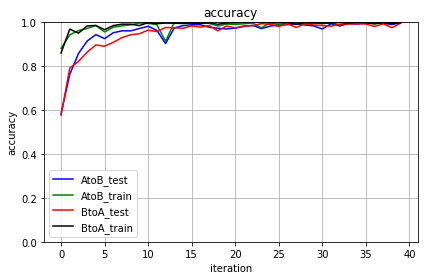

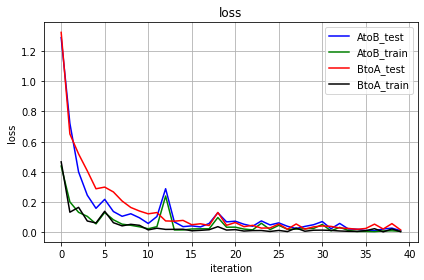

    airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0        499         484   516  523   508  493   503    490   497    487
1        288         382   243  186   228  190   386    316   399    302
2        247         304   179  120   137  160   310    266   332    258
3        227         296   123   77    96  122   290    239   301    214
4        207         285   113   50    83  109   276    230   265    199
5        187         273   109   32    74  107   272    214   259    189
6        186         260    99   16    65  105   255    205   222    176
7        182         243    90   11    59   89   251    199   221    169
8        173         233    87    4    53   89   250    196   208    163
9        167         226    84    1    46   80   248    191   197    160
10       156         224    82    1    43   78   239    184   197    157
11       151         219    80    1    42   78   237    183   193    153
12       151         214    72    0    40   76   22

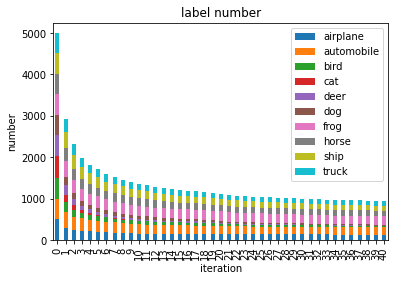

    airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0        499         484   516  523   508  493   503    490   497    487
1        288         382   243  186   228  190   386    316   399    302
2        247         304   179  120   137  160   310    266   332    258
3        227         296   123   77    96  122   290    239   301    214
4        207         285   113   50    83  109   276    230   265    199
5        187         273   109   32    74  107   272    214   259    189
6        186         260    99   16    65  105   255    205   222    176
7        182         243    90   11    59   89   251    199   221    169
8        173         233    87    4    53   89   250    196   208    163
9        167         226    84    1    46   80   248    191   197    160
10       156         224    82    1    43   78   239    184   197    157
11       151         219    80    1    42   78   237    183   193    153
12       151         214    72    0    40   76   22

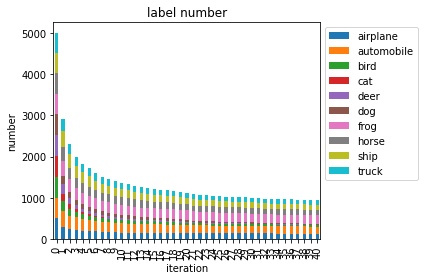

    airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0        506         490   516  493   491  444   527    511   528    494
1        313         370   234  201   226  219   369    325   337    326
2        242         338   149   82   153  145   348    298   309    249
3        226         302   116   47   116  132   312    266   241    227
4        195         281   102   29    99  112   306    255   232    206
5        188         274    99   24    83  104   300    242   215    187
6        182         243    96   13    71   95   282    229   203    175
7        175         238    95    7    60   90   276    215   196    162
8        172         238    89    5    49   83   274    213   178    155
9        164         234    79    2    44   76   267    205   175    154
10       159         227    77    0    42   71   262    205   166    152
11       156         221    76    0    39   64   262    205   162    152
12       151         199    75    0    37   59   25

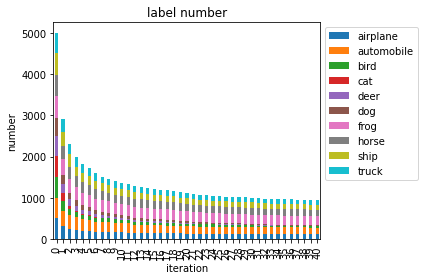

In [0]:
AtoB_train_loss=[]
AtoB_train_acc=[]
AtoB_test_loss=[]
AtoB_test_acc=[]
BtoA_train_loss=[]
BtoA_train_acc=[]
BtoA_test_loss=[]
BtoA_test_acc=[]
for i in range(repetition):
  print('%d回目' % i)
  
  model_AtoB=model()
  model_BtoA=model()
  model_AtoB.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])


  model_BtoA.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])
  
  #A->train,B->test
  model_AtoB.fit(x_a,y_a,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  AtoB_train_loss.append(model_AtoB.evaluate(x_a,y_a)[0])
  AtoB_train_acc.append(model_AtoB.evaluate(x_a,y_a)[1])
  AtoB_test_loss.append(model_AtoB.evaluate(x_b,y_b)[0])
  AtoB_test_acc.append(model_AtoB.evaluate(x_b,y_b)[1])
  y_b_pred=model_AtoB.predict_classes(x_b)
  y_b_true=np.argmax(y_b,axis=1)
  # Bの間違い
  B_miss=[]
  for j in range(data_num_ab):
    if y_b_pred[j] != y_b_true[j]:
      B_miss.append(j)

  #B->train,A->test
  model_BtoA.fit(x_b,y_b,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  BtoA_train_loss.append(model_BtoA.evaluate(x_b,y_b)[0])
  BtoA_train_acc.append(model_BtoA.evaluate(x_b,y_b)[1])
  BtoA_test_loss.append(model_BtoA.evaluate(x_a,y_a)[0])
  BtoA_test_acc.append(model_BtoA.evaluate(x_a,y_a)[1])
  y_a_pred=model_BtoA.predict_classes(x_a)
  y_a_true=np.argmax(y_a,axis=1)
  # Aの間違い
  A_miss=[]
  for j in range(data_num_ab):
    if y_a_pred[j] != y_a_true[j]:
      A_miss.append(j)


  random.shuffle(A_miss)
  random.shuffle(B_miss)
    
  length=len(A_miss)-len(B_miss)
  if length>0:
    A_miss=A_miss[length:]
  if length<0:
    B_miss=B_miss[-length:]

  x_a=np.delete(x_a,A_miss,0)
  y_a=np.delete(y_a,A_miss,0)
  x_b=np.delete(x_b,B_miss,0)
  y_b=np.delete(y_b,B_miss,0)

  data_num_ab=len(x_a)

  # ラベルの数え上げ
  y_a=np.argmax(y_a,axis=1)
  y_b=np.argmax(y_b,axis=1)
  y_a_num=[]
  y_a_num = [0 for l in range(10)]
  y_b_num=[]
  y_b_num = [0 for l in range(10)]
  for j in range(10):
    for k in range(data_num_ab):
      if y_a[k]==j:
        y_a_num[j]+=1
  for j in range(10):
    for k in range(data_num_ab):
      if y_b[k]==j:
        y_b_num[j]+=1
  y_a=to_categorical(y_a,10)
  y_b=to_categorical(y_b,10)


  y_a_num_history.append(y_a_num)
  y_b_num_history.append(y_b_num)




import os


SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/acc/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)
with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "w")as f:
  f.writelines(str(AtoB_test_acc))
with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "w")as f:
  f.writelines(str(AtoB_train_acc))
with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "w")as f:
  f.writelines(str(BtoA_test_acc))
with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "w")as f:
  f.writelines(str(BtoA_train_acc))

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/loss/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)
with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "w")as f:
  f.writelines(str(AtoB_test_loss))
with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "w")as f:
  f.writelines(str(AtoB_train_loss))
with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "w")as f:
  f.writelines(str(BtoA_test_loss))
with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "w")as f:
  f.writelines(str(BtoA_train_loss))


import matplotlib.pyplot as plt


fig, ax = plt.subplots()



y1=[]
y2=[]
y3=[]
y4=[]

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/acc/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"

with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)
#print(type(y1))
#print(y1)

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/acc/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"


c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('iteration')
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title('accuracy') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()


fig, ax = plt.subplots()



y1=[]
y2=[]
y3=[]
y4=[]

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/loss/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"

with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)
#print(type(y1))
#print(y1)

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/loss/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"


c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('iteration')
ax.set_ylabel('loss')  # y軸ラベル
ax.set_title('loss') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"
dataset = pd.DataFrame(y_a_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f".csv")

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)

dataset = pd.DataFrame(y_a_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig(SAVE_DATA_DIR_PATH + f"A_label.png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f"A_label.csv")

dataset = pd.DataFrame(y_b_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig(SAVE_DATA_DIR_PATH + f"B_label.png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f"B_label.csv")

   airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0       499         484   516  523   508  493   503    490   497    487
1       316         411   192  173   264  183   384    301   327    301
2       229         311   139   70   162  141   319    242   297    238
3       194         291    96   45   114  119   288    210   271    208
4       179         266    81   19   113   91   281    189   242    178
5       173         238    76   14   102   86   273    173   225    166


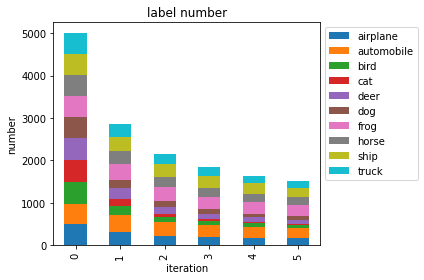

   airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0       506         490   516  493   491  444   527    511   528    494
1       292         305   226  147   294  221   351    304   389    323
2       204         274   128   80   198  142   296    243   345    238
3       182         252   105   40   181  101   292    216   257    210
4       165         225    81   28   138   96   277    201   236    192
5       148         221    76   12   124   81   267    188   228    181


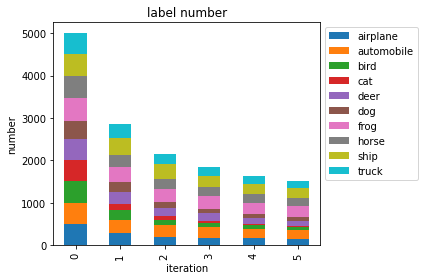

In [0]:
SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/delete_miss/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)

dataset = pd.DataFrame(y_a_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig(SAVE_DATA_DIR_PATH + f"A_label.png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f"A_label.csv")

dataset = pd.DataFrame(y_b_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig(SAVE_DATA_DIR_PATH + f"B_label.png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f"B_label.csv")

In [0]:
dataset.to_csv(SAVE_DATA_DIR_PATH + f".csv")

In [0]:
dataset_1=pd.read_csv(SAVE_DATA_DIR_PATH + f".csv")

In [0]:
dataset_1.to_csv(SAVE_DATA_DIR_PATH + f"_1.csv")

In [0]:
print(dataset)
print(dataset_1)

   airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0       499         484   516  523   508  493   503    490   497    487
1       148         147    32   48    38  177   438    190   185    156
2        81          46     1    2    21    5    55     77   177      3
3        19           6     0    1     5    1    16     15   177      1
   Unnamed: 0  airplane  automobile  bird  cat  ...  dog  frog  horse  ship  truck
0           0       499         484   516  523  ...  493   503    490   497    487
1           1       148         147    32   48  ...  177   438    190   185    156
2           2        81          46     1    2  ...    5    55     77   177      3
3           3        19           6     0    1  ...    1    16     15   177      1

[4 rows x 11 columns]


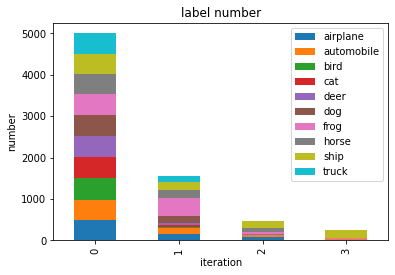

In [0]:
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()

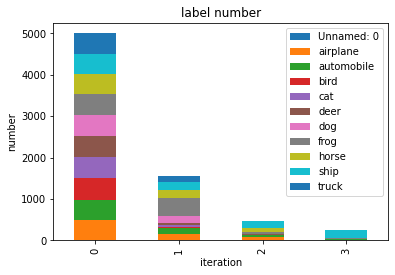

In [0]:
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset_1.plot(kind='bar', stacked=True, ax=ax)
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()

In [0]:
print(y_a.shape)
print(y_b.shape)

(1626,)
(1626,)


In [0]:
print(len(x_a))
print(len(x_b))
print(len(y_a))
print(len(y_b))
print(x_a.shape)
print(y_a.shape)
print(len(A_miss))

1626
1626
1626
1626
(1626, 32, 32, 3)
(1626,)
3374
